<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo I: Ejemplo EDA Housing Data </font> </center>



Pasos para hacer un EDA para el dataset `housing.csv`

1. **Cargando el dataset**: Cargamos el dataset de precios de casas desde una URL en un DataFrame de pandas.
2. **Entender la estructura del dataset**: Usamos `head()`, `info()` y `describe()` para obtener una visión general del dataset.
3. **Estadísticas descriptivas**: Mostramos estadísticas descriptivas para entender la distribución de los datos.
4. **Verificar valores faltantes**: Verificamos si hay valores faltantes en el dataset.
5. **Visualizar los datos**:
   - **Histogramas**: Graficamos histogramas para cada característica numérica para entender sus distribuciones.
   - **Scatterplots**: Usamos `seaborn.scatterplot` para visualizar la relación entre características y el precio de venta.
   - **Matriz de Correlación**: Graficamos un heatmap de la matriz de correlación para ver la correlación entre características.
   - **Boxplots**: Usamos boxplots para visualizar la distribución del valor de la casa por categoría de ingreso.
   - **Countplot**: Usamos countplots para visualizar la distribución de la categoría de ingreso.

### Gráficos
- **Histogramas**: Muestran la distribución de las características numéricas.
- **Scatterplots**: Muestran la relación entre características y el precio de venta.
- **Matriz de Correlación**: Muestra la correlación entre características.
- **Boxplots**: Muestran la distribución del valor de la casa por categoría de ingreso.
- **Countplot**: Muestra la distribución de la categoría de ingreso.

Este EDA proporciona una visión completa del dataset de precios de casas, ayudando a entender la estructura de los datos, su distribución y las relaciones entre las características.

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
# Mostrar las primeras filas del dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Mostrar información básica sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Mostrar estadísticas descriptivas
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
# Verificar valores faltantes
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### reporte de calidad de datos (dqr)

In [6]:
from CDIN import CDIN as cd

In [7]:
cd.dqr(df)

,Nombre columnas,Tipo de datos,valores faltantes,Valores presentes,valores unicos,lista valores unicos,Valores Max,Valores Min
longitude,longitude,float64,0,20640,844,"[-122.23, -122.22, -122.24, -122.25, -122.26, ...",-114.31,-124.35
latitude,latitude,float64,0,20640,862,"[37.88, 37.86, 37.85, 37.84, 37.83, 37.82, 37....",41.95,32.54
housing_median_age,housing_median_age,float64,0,20640,52,"[41.0, 21.0, 52.0, 42.0, 50.0, 40.0, 49.0, 48....",52.0,1.0
total_rooms,total_rooms,float64,0,20640,5926,"[880.0, 7099.0, 1467.0, 1274.0, 1627.0, 919.0,...",39320.0,2.0
total_bedrooms,total_bedrooms,float64,207,20433,1923,"[129.0, 1106.0, 190.0, 235.0, 280.0, 213.0, 48...",6445.0,1.0
population,population,float64,0,20640,3888,"[322.0, 2401.0, 496.0, 558.0, 565.0, 413.0, 10...",35682.0,3.0
households,households,float64,0,20640,1815,"[126.0, 1138.0, 177.0, 219.0, 259.0, 193.0, 51...",6082.0,1.0
median_income,median_income,float64,0,20640,12928,"[8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.036...",15.0001,0.4999
median_house_value,median_house_value,float64,0,20640,3842,"[452600.0, 358500.0, 352100.0, 341300.0, 34220...",500001.0,14999.0
ocean_proximity,ocean_proximity,object,0,20640,5,"[NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND]",NEAR OCEAN,<1H OCEAN


In [8]:
df_cd = cd(df)
df_cd

In [9]:
df_cd.get_cualitativos()

(Index(['ocean_proximity'], dtype='object'),
       ocean_proximity
 0            NEAR BAY
 1            NEAR BAY
 2            NEAR BAY
 3            NEAR BAY
 4            NEAR BAY
 ...               ...
 20635          INLAND
 20636          INLAND
 20637          INLAND
 20638          INLAND
 20639          INLAND
 
 [20640 rows x 1 columns])

In [10]:
df_cd.get_cuantitativos()

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value'],
       dtype='object'),
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0        -122.23     37.88                41.0        880.0           129.0   
 1        -122.22     37.86                21.0       7099.0          1106.0   
 2        -122.24     37.85                52.0       1467.0           190.0   
 3        -122.25     37.85                52.0       1274.0           235.0   
 4        -122.25     37.85                52.0       1627.0           280.0   
 ...          ...       ...                 ...          ...             ...   
 20635    -121.09     39.48                25.0       1665.0           374.0   
 20636    -121.21     39.49                18.0        697.0           150.0   
 20637    -121.22     39.43                17.0       2254.0           485.0   
 206

##### Limpieza de datos

In [11]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [12]:
df['total_bedrooms'].isnull().sum()

0

In [13]:
df['ocean_proximity'].apply(cd.lowercase_text)

0        near bay
1        near bay
2        near bay
3        near bay
4        near bay
           ...   
20635      inland
20636      inland
20637      inland
20638      inland
20639      inland
Name: ocean_proximity, Length: 20640, dtype: object

#### graficas

<Figure size 864x576 with 0 Axes>

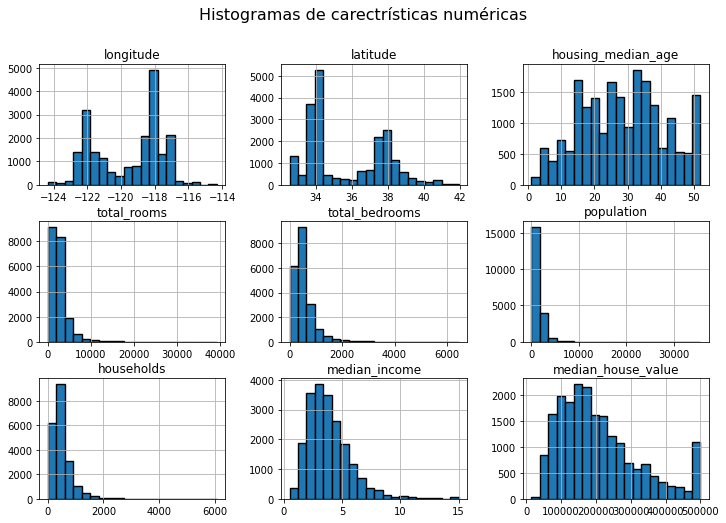

In [15]:
# Visualizar la distribución de las características numéricas
plt.figure(figsize=(12,8))
df.hist(bins=20, edgecolor='black', linewidth=1.4, figsize=(12,8))
plt.suptitle('Histogramas de carectrísticas numéricas', fontsize=16)
plt.show()

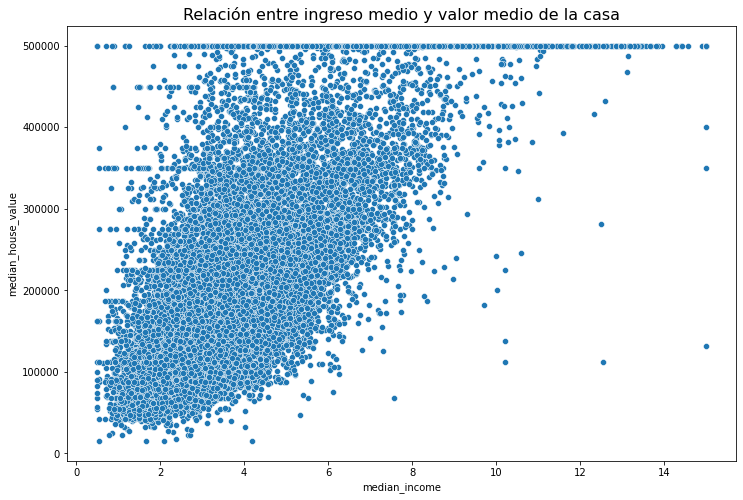

In [17]:
# Visualizar la relación entre las características y el precio de venta
plt.figure(figsize=(12,8))
sn.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Relación entre ingreso medio y valor medio de la casa', fontsize=16)
plt.show()

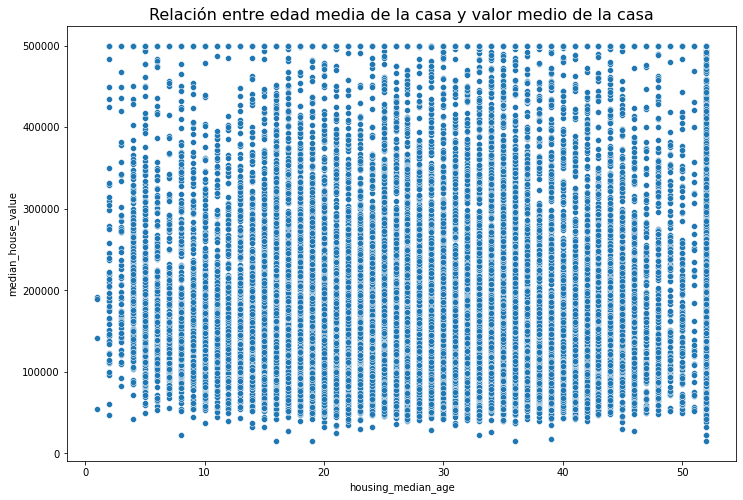

In [18]:
plt.figure(figsize=(12,8))
sn.scatterplot(x='housing_median_age', y='median_house_value', data=df)
plt.title('Relación entre edad media de la casa y valor medio de la casa', fontsize=16)
plt.show()

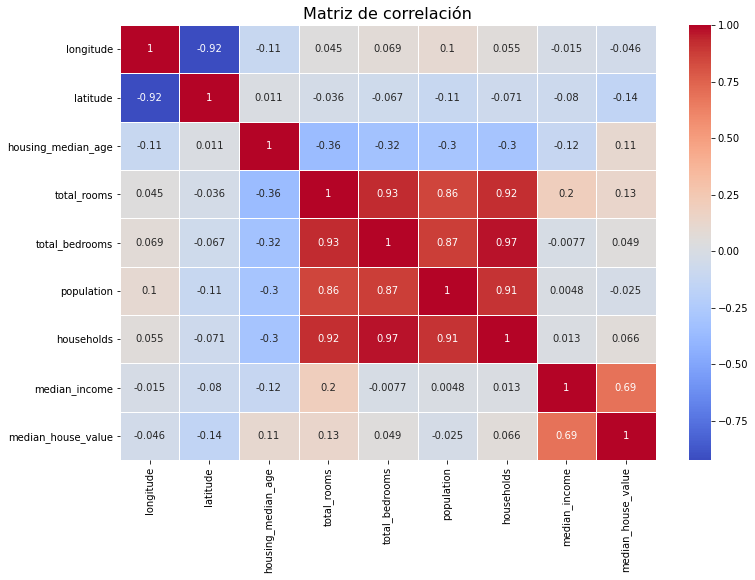

In [20]:
# Visualizar la matriz de correlación
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación', fontsize=16)
plt.show()

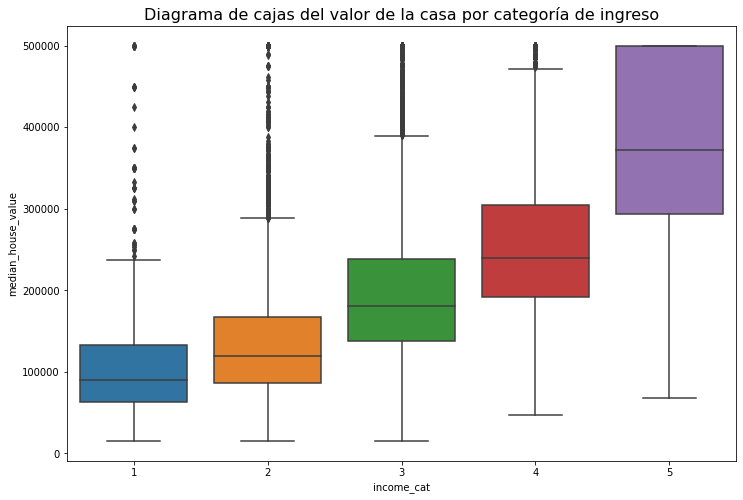

In [21]:
# Boxplot para visualizar la distribución del valor de la casa por categoría de ingreso
df['income_cat'] = pd.cut(df['median_income'], bins=[0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])
plt.figure(figsize=(12,8))
sn.boxplot(x='income_cat', y='median_house_value', data=df)
plt.title('Diagrama de cajas del valor de la casa por categoría de ingreso', fontsize=16)
plt.show()

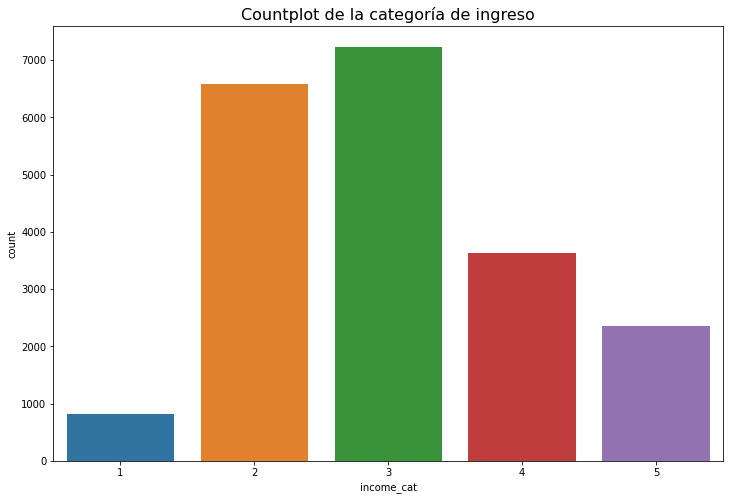

In [22]:
# Countplot para visualizar la distribución de la categoría de ingreso
plt.figure(figsize=(12,8))
sn.countplot(x='income_cat', data=df)
plt.title('Countplot de la categoría de ingreso', fontsize=16)
plt.show()

### Actividad 4

> Un dato se considera atípico si aparece por fuera de un rango que se considera válido o aceptable para el fenómeno que se analiza.

> Para determinar si los datos tienen valores atípicos es posible usar gráficas de bigotes en los datos.

> Para cuantificar el rango aceptable o permitido para encontrar datos atípicos se utiliza el parámetro IQR (inter quantilerange).

$$IQR=75^{th}quantile - 25^{th}quantile$$
$$upper_{boundary}=75^{th}quantile+(\alpha*IQR)$$
$$lower_{boundary}=25^{th}quantile-(\alpha*IQR)$$

donde $\alpha$=1.5, y está relacionado a la probabilidad de ocurrencia si los datos tuvieran una distribución normal.

**Considere el dataset `housing.csv`, elimine los outliers de cada columna numérica que se encuentre en el dataset, puede utilizar el código de la celda de abajo**

```
#Funcion para determinar más específicamente los outliers a través del rango IQR

def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

for col in data.columns:
    lmin,lmax = find_boundaries(data[col])
    outliers = np.where(data[col] > lmax, True,np.where(data['Indice_Refraccion'] < lmin, True, False))
    outliers_df = data.loc[outliers, col]
    print(f'column: {col}\n{outliers_df.head()}')
```

**Agregue el código a su librería CDIN, importela y grafique nuevamente con un gráfico de bigotes las columnas numéricas después de haber eliminado los outliers**